### <span style='color:blue'>**Librerías con las que vamos a trabajar**</span>

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import os
import ROOT
import uproot

In [ ]:
Copiamos el siguiente código en una terminal:

cp /home/shared/odin/Taller_Economia.ipynb /home/jovyan

In [7]:
!cd /home/shared/odin;ls

CAN_CHN_EXPORT.root  CHN_USA_IMPORT.root	  Taller_Economia.ipynb
CAN_CHN_IMPORT.root  MEX_CHN_EXPORT.root	  USA_CHN_EXPORT.root
CHN_CAN_EXPORT.root  MEX_CHN_IMPORT.root	  USA_CHN_IMPORT.root
CHN_CAN_IMPORT.root  MEX_USA_EXPORT.root	  USA_MEX_EXPORT.root
CHN_MEX_EXPORT.root  MEX_USA_IMPORT.root	  USA_MEX_IMPORT.root
CHN_MEX_IMPORT.root  OG_RANK_PRODUCT_EXPORT.root
CHN_USA_EXPORT.root  OG_RANK_PRODUCT_IMPORT.root


## <span style='color:blue'>Creando archivos ROOT</span>

Ya que conocemos qué archivos existen en la ruta `"/home/shared/worldbank"`, vamos a agregar el nombre de estos archivos en dos listas.

* archivos_exp = Contendrá todos los archivos relacionados a EXPORTACIÓN
* archivos_imp = Contendrá todos los archivos relacionados a IMPORTACIÓN

Para generar estas listas de nombres de archivos de exportación e importación tenemos dos métodos:

**Primer Método**

**Todos los nombres de los archivos** contenidos en la ruta `"/home/shared/worldbank"`, **serán colocados** dentro de una **lista**.

Para ello invocaremos al comando `listdir` de la librería `os`.

In [8]:
# Creación de lista de archivos dentro de la ruta

ruta = "/home/shared/worldbank"
archivos = os.listdir(ruta) # Genera una lista cuyos elementos seran cadenas de los nombres de los archivos dentro de la ruta.
print(archivos)

['OG_RANK_PRODUCT_2005_EXPORT_2024Nov14.csv', 'OG_RANK_PRODUCT_2018_EXPORT_2025Feb09.csv', 'OG_RANK_PRODUCT_2013_EXPORT_2024Oct09.csv', 'OG_RANK_PRODUCT_2002_EXPORT_2024Oct09.csv', 'OG_RANK_PRODUCT_2006_IMPORT_2024Nov14.csv', 'OG_RANK_PRODUCT_2010_IMPORT_2024Oct09.csv', 'OG_RANK_PRODUCT_2020_EXPORT_2025Feb09.csv', 'OG_RANK_PRODUCT_1999_EXPORT_2024Jun24.csv', 'OG_RANK_PRODUCT_1991_IMPORT_2024Jun24.csv', 'OG_RANK_PRODUCT_1992_EXPORT_2024Jun24.csv', 'OG_RANK_PRODUCT_2021_EXPORT_2025Jan09.csv', 'OG_RANK_PRODUCT_1994_EXPORT_2024Jun24.csv', 'OG_RANK_PRODUCT_1997_IMPORT_2024Jun24.csv', 'OG_RANK_PRODUCT_2001_EXPORT_2024Aug09.csv', 'OG_RANK_PRODUCT_2008_EXPORT_2024Nov14.csv', 'OG_RANK_PRODUCT_2014_EXPORT_2024Nov05.csv', 'OG_RANK_PRODUCT_2017_IMPORT_2025Jan09.csv', 'OG_RANK_PRODUCT_2007_IMPORT_2024Nov14.csv', 'OG_RANK_PRODUCT_2011_IMPORT_2024Oct09.csv', 'OG_RANK_PRODUCT_2003_EXPORT_2024Oct09.csv', 'OG_RANK_PRODUCT_2004_EXPORT_2024Nov14.csv', 'OG_RANK_PRODUCT_2012_EXPORT_2024Oct09.csv', 'OG_RANK_

De esta lista separaremos aquellos que son de exportación de los que son de importación:

In [9]:
# Primer método

ruta = "/home/shared/worldbank"

archivos_exp = []
archivos_imp = []

archivos = os.listdir(ruta)
for archivo in archivos:
    if ('OG_RANK_PRODUCT_' in archivo) and ('EXPORT' in archivo) and (".csv" in archivo):
        archivos_exp.append(archivo) # Datos Exportación
    elif ('OG_RANK_PRODUCT_' in archivo) and ('IMPORT' in archivo) and (".csv" in archivo):
        archivos_imp.append(archivo) # Datos Importación


In [10]:
# Imprimimos el contenido de estas listas:

exp_str = '\n'.join(archivos_exp)
imp_str = '\n'.join(archivos_imp)

print(f"""
Archivos de Exportación:
{exp_str}

{'#' * 120}
{'#' * 120}

Archivos de Importación:
{imp_str}

""")


Archivos de Exportación:
OG_RANK_PRODUCT_2005_EXPORT_2024Nov14.csv
OG_RANK_PRODUCT_2018_EXPORT_2025Feb09.csv
OG_RANK_PRODUCT_2013_EXPORT_2024Oct09.csv
OG_RANK_PRODUCT_2002_EXPORT_2024Oct09.csv
OG_RANK_PRODUCT_2020_EXPORT_2025Feb09.csv
OG_RANK_PRODUCT_1999_EXPORT_2024Jun24.csv
OG_RANK_PRODUCT_1992_EXPORT_2024Jun24.csv
OG_RANK_PRODUCT_2021_EXPORT_2025Jan09.csv
OG_RANK_PRODUCT_1994_EXPORT_2024Jun24.csv
OG_RANK_PRODUCT_2001_EXPORT_2024Aug09.csv
OG_RANK_PRODUCT_2008_EXPORT_2024Nov14.csv
OG_RANK_PRODUCT_2014_EXPORT_2024Nov05.csv
OG_RANK_PRODUCT_2003_EXPORT_2024Oct09.csv
OG_RANK_PRODUCT_2004_EXPORT_2024Nov14.csv
OG_RANK_PRODUCT_2012_EXPORT_2024Oct09.csv
OG_RANK_PRODUCT_2019_EXPORT_2025Feb09.csv
OG_RANK_PRODUCT_1989_EXPORT_2024Jun24.csv
OG_RANK_PRODUCT_1993_EXPORT_2024Jun24.csv
OG_RANK_PRODUCT_1998_EXPORT_2024Jun24.csv
OG_RANK_PRODUCT_2000_EXPORT_2024Aug09.csv
OG_RANK_PRODUCT_1995_EXPORT_2024Jun24.csv
OG_RANK_PRODUCT_2015_EXPORT_2024Nov05.csv
OG_RANK_PRODUCT_2009_EXPORT_2024Nov14.csv
OG_RANK_

**Segundo Método**

El segundo método consiste en utilizar listas por comprensión.

In [11]:
# Segundo Método
# Versión con lista por comprensión

ruta = "/home/shared/worldbank"
archivos = os.listdir(ruta)

archivos_exp = [archivo for archivo in archivos if ('EXPORT' in archivo)]
archivos_imp = [archivo for archivo in archivos if ('IMPORT' in archivo)]

In [12]:
# Corroboramos nuevamente el contenido de las listas para verificar que efectivamente da el mismo resultado.

exp_str = '\n'.join(archivos_exp)
imp_str = '\n'.join(archivos_imp)

print(f"""
Archivos de Exportación:
{exp_str}

{'#' * 120}
{'#' * 120}

Archivos de Importación:
{imp_str}

""")


Archivos de Exportación:
OG_RANK_PRODUCT_2005_EXPORT_2024Nov14.csv
OG_RANK_PRODUCT_2018_EXPORT_2025Feb09.csv
OG_RANK_PRODUCT_2013_EXPORT_2024Oct09.csv
OG_RANK_PRODUCT_2002_EXPORT_2024Oct09.csv
OG_RANK_PRODUCT_2020_EXPORT_2025Feb09.csv
OG_RANK_PRODUCT_1999_EXPORT_2024Jun24.csv
OG_RANK_PRODUCT_1992_EXPORT_2024Jun24.csv
OG_RANK_PRODUCT_2021_EXPORT_2025Jan09.csv
OG_RANK_PRODUCT_1994_EXPORT_2024Jun24.csv
OG_RANK_PRODUCT_2001_EXPORT_2024Aug09.csv
OG_RANK_PRODUCT_2008_EXPORT_2024Nov14.csv
OG_RANK_PRODUCT_2014_EXPORT_2024Nov05.csv
OG_RANK_PRODUCT_2003_EXPORT_2024Oct09.csv
OG_RANK_PRODUCT_2004_EXPORT_2024Nov14.csv
OG_RANK_PRODUCT_2012_EXPORT_2024Oct09.csv
OG_RANK_PRODUCT_2019_EXPORT_2025Feb09.csv
OG_RANK_PRODUCT_1989_EXPORT_2024Jun24.csv
OG_RANK_PRODUCT_1993_EXPORT_2024Jun24.csv
OG_RANK_PRODUCT_1998_EXPORT_2024Jun24.csv
OG_RANK_PRODUCT_2000_EXPORT_2024Aug09.csv
OG_RANK_PRODUCT_1995_EXPORT_2024Jun24.csv
OG_RANK_PRODUCT_2015_EXPORT_2024Nov05.csv
OG_RANK_PRODUCT_2009_EXPORT_2024Nov14.csv
OG_RANK_

Una vez que tenemos las listas con los nombres de los archivos, podemos crear dos archivos `.root`.

* **Archivo de exportaciones:** `OG_RANK_PRODUCT_EXPORT.root`

* **Archivo de importaciones:** `OG_RANK_PRODUCT_IMPORT.root`

## <span style='color:red'>**PRECAUCIÓN:**</span> <span style='color:orange'>**NO EJECUTE EL SIGUIENTE CÓDIGO.**</span>

El siguiente código convierte toda la información de los archivos `.csv` a archivos `.root`. Sin embargo, su ejecución puede ser muy lenta, por lo que únicamente incluiremos el código como referencia.

A pesar de su tiempo de ejecución, los archivos `.root` son mucho más rápidos y eficientes que los archivos `.csv`. Si planeamos trabajar de manera continua con estos datos, entonces conviene realizar esta transformación, incluso si toma tiempo, porque se optimiza el procesamiento posterior.



In [ ]:
# Conversión a archivo .root

E_I = ["EXPORT", "IMPORT"]
archivos_E_I = [archivos_exp,archivos_imp]
for k in range(2):
    with uproot.recreate(f"OG_RANK_PRODUCT_{E_I[k]}.root") as f:
        for archivo in archivos_E_I[k]:
            print(f"Procesando archivo: {archivo}")
            tree_name = archivo.replace(".csv", "")        
            f[tree_name] = pd.read_csv(ruta + '/' + archivo)
    print(f"Archivo OG_RANK_PRODUCT_{E_I[k]}.root creado")

Procesando archivo: OG_RANK_PRODUCT_2005_EXPORT_2024Nov14.csv


/tmp/ipykernel_2054/3035321355.py:10: FutureWarning: Starting in version 5.7.0, Uproot will default to writing RNTuples instead of TTrees. You will need to use `mktree` to explicitly create a TTree. Please update your code accordingly.
  f[tree_name] = pd.read_csv(ruta + '/' + archivo)


Procesando archivo: OG_RANK_PRODUCT_2018_EXPORT_2025Feb09.csv
Procesando archivo: OG_RANK_PRODUCT_2013_EXPORT_2024Oct09.csv


## <span style='color:blue'> Apertura del archivo ROOT</span>

El siguiente código intenta **abrir el archivo `.root` de exportación**, verifica que se haya abierto correctamente y lista su contenido.

In [13]:
# import ROOT # Para que este bloque corra es necesario que ya tengamos importada la librería ROOT. Esta librería se debió importar en el primer bloque de código.
f = ROOT.TFile.Open("/home/shared/odin/OG_RANK_PRODUCT_EXPORT.root")
if not f or f.IsZombie():
    print("Error: No se pudo abrir el archivo")
else:
    print("Archivo abierto correctamente")
    f.ls()  # Con esta línea vamos a explorar el contenido del archivo .root

Archivo abierto correctamente
TFile**		/home/shared/odin/OG_RANK_PRODUCT_EXPORT.root	
 TFile*		/home/shared/odin/OG_RANK_PRODUCT_EXPORT.root	
  KEY: TTree	OG_RANK_PRODUCT_2005_EXPORT_2024Nov14;1	
  KEY: TTree	OG_RANK_PRODUCT_2018_EXPORT_2025Feb09;1	
  KEY: TTree	OG_RANK_PRODUCT_2013_EXPORT_2024Oct09;1	
  KEY: TTree	OG_RANK_PRODUCT_2002_EXPORT_2024Oct09;1	
  KEY: TTree	OG_RANK_PRODUCT_2020_EXPORT_2025Feb09;1	
  KEY: TTree	OG_RANK_PRODUCT_1999_EXPORT_2024Jun24;1	
  KEY: TTree	OG_RANK_PRODUCT_1992_EXPORT_2024Jun24;1	
  KEY: TTree	OG_RANK_PRODUCT_2021_EXPORT_2025Jan09;1	
  KEY: TTree	OG_RANK_PRODUCT_1994_EXPORT_2024Jun24;1	
  KEY: TTree	OG_RANK_PRODUCT_2001_EXPORT_2024Aug09;1	
  KEY: TTree	OG_RANK_PRODUCT_2008_EXPORT_2024Nov14;1	
  KEY: TTree	OG_RANK_PRODUCT_2014_EXPORT_2024Nov05;1	
  KEY: TTree	OG_RANK_PRODUCT_2003_EXPORT_2024Oct09;1	
  KEY: TTree	OG_RANK_PRODUCT_2004_EXPORT_2024Nov14;1	
  KEY: TTree	OG_RANK_PRODUCT_2012_EXPORT_2024Oct09;1	
  KEY: TTree	OG_RANK_PRODUCT_2019_EXPORT_2025Feb

<span style='color:red'>**NOTA:**</span> El comando `f.ls()` nos permite explorar el contenido del `.root`. El archivo `.root` está formado por varios TTree o también llamados árboles. Por ejemplo `"OG_RANK_PRODUCT_1997_EXPORT_2024Jun24"` es el nombre de un TTree.

Cada **TTree representa una tabla** guardada en el archivo `.root`. **Las columnas de cada TTree** son llamados **Branches o ramas**.

Nota que ademas del nombre del TTree, también aparece `KEY: TTree` y `;1`. Por lo tanto, nos gustaría tener un comando que nos permita extraer únicamente el nombre de los TTree sin esa otra información extra.

El siguiente comando muestra el tipo de lista de objetos (THashList) que contiene el archivo `.root`

In [14]:
print(f.GetListOfKeys().GetName())

THashList


Si usamos el comando `type()` podemos verificar el mismo tipo de iterable:

In [15]:
print(type(f.GetListOfKeys()))

<class cppyy.gbl.THashList at 0xcdf3560>


El siguiente código lista los nombres de todos los objetos TTrees contenidos en el archivo `.root`.

In [16]:
for key in f.GetListOfKeys():
    print(key.GetName())

OG_RANK_PRODUCT_2005_EXPORT_2024Nov14
OG_RANK_PRODUCT_2018_EXPORT_2025Feb09
OG_RANK_PRODUCT_2013_EXPORT_2024Oct09
OG_RANK_PRODUCT_2002_EXPORT_2024Oct09
OG_RANK_PRODUCT_2020_EXPORT_2025Feb09
OG_RANK_PRODUCT_1999_EXPORT_2024Jun24
OG_RANK_PRODUCT_1992_EXPORT_2024Jun24
OG_RANK_PRODUCT_2021_EXPORT_2025Jan09
OG_RANK_PRODUCT_1994_EXPORT_2024Jun24
OG_RANK_PRODUCT_2001_EXPORT_2024Aug09
OG_RANK_PRODUCT_2008_EXPORT_2024Nov14
OG_RANK_PRODUCT_2014_EXPORT_2024Nov05
OG_RANK_PRODUCT_2003_EXPORT_2024Oct09
OG_RANK_PRODUCT_2004_EXPORT_2024Nov14
OG_RANK_PRODUCT_2012_EXPORT_2024Oct09
OG_RANK_PRODUCT_2019_EXPORT_2025Feb09
OG_RANK_PRODUCT_1989_EXPORT_2024Jun24
OG_RANK_PRODUCT_1993_EXPORT_2024Jun24
OG_RANK_PRODUCT_1998_EXPORT_2024Jun24
OG_RANK_PRODUCT_2000_EXPORT_2024Aug09
OG_RANK_PRODUCT_1995_EXPORT_2024Jun24
OG_RANK_PRODUCT_2015_EXPORT_2024Nov05
OG_RANK_PRODUCT_2009_EXPORT_2024Nov14
OG_RANK_PRODUCT_1990_EXPORT_2024Jun24
OG_RANK_PRODUCT_2022_EXPORT_2025Feb09
OG_RANK_PRODUCT_2011_EXPORT_2024Oct09
OG_RANK_PROD

## <span style='color:blue'>**Inspección de un TTree**</span>

Ahora vamos a **explorar la estructura de un árbol** dentro del archivo, es decir, sus ramas y su número de entradas.

1. **Nombre del árbol.**
2. **Lista de ramas (variables, campos o columnas).**
3. **Número total de registros o filas.**

Primero, obtenemos el TTree llamado `"OG_RANK_PRODUCT_2005_EXPORT_2024Nov14"` del archivo `.root`.

In [17]:
tree = f.Get("OG_RANK_PRODUCT_2005_EXPORT_2024Nov14")

Y mostramos información detallada del TTree: Ramas y número de entradas.

In [18]:
tree.Print()

******************************************************************************
*Tree    :OG_RANK_PRODUCT_2005_EXPORT_2024Nov14:                                                        *
*Entries :  6507975 : Total =       566201145 bytes  File  Size =   84961418 *
*        :          : Tree compression factor =   6.66                       *
******************************************************************************
*Br    0 :index     : index/L                                                *
*Entries :  6507975 : Total  Size=   52064398 bytes  File Size  =    9989794 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   5.21     *
*............................................................................*
*Br    1 :ReporterISO3 : ReporterISO3/C                                      *
*Entries :  6507975 : Total  Size=   52064433 bytes  File Size  =    7887387 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   6.60     *
*........................

También, es posible imprimir el **número total de entradas (filas) del TTree**:

In [19]:
print("Entradas totales:",tree.GetEntries())

Entradas totales: 6507975


Si queremos conocer el nombre de las ramas de un TTree, requerimos utilizar el comando `GetListOfBranches()`.

In [20]:
tree.GetListOfBranches() # Si solo escribimos esto, no obtenemos el nombre de las ramas.

* Sin embargo, por sí solo no entrega el nombre de las ramas. 

* Lo que arroja es una descripción de que python está mostrando un objeto de C++ mediante cppyy. TObjArray es la clase de C++ del objeto, en este caso un arreglo de objetos.

* object at 0x55967a039b98 indica la dirección de memoria donde se creó este objeto.

Para imprimir cada rama, requerimos correr un ciclo `for` como el siguiente:

In [21]:
# Requerimos realizar un ciclo for para obtener el nombre de cada rama
for branch in tree.GetListOfBranches():
    print(branch.GetName())

index
ReporterISO3
PartnerISO3
ProductCode
StartYear
EndYear
TradeValue
TotalTradeValue
PercentageOfTotal
Nomencode
Rank


## <span style='color:blue'>**Lectura de datos desde un TTree**</span>

**Objetivo:** Acceder a los valores de las ramas de un TTree y mostrar algunas filas de manera sencilla.

1. Acceder a las ramas.
2. Otra opción: Extraer una rama completa.
3. Convertir todo el TTree a un DataFrame de pandas.

### <span style='color:green'>**Acceder a las ramas**</span>

Ya que conocemos el nombre de las ramas, podemos recorrer las entradas de la siguiente manera:

In [22]:
n = 5  # Número de filas que queremos imprimir

for i, event in enumerate(tree):
    reporter = "".join(event.ReporterISO3)  
    partner  = "".join(event.PartnerISO3)  
    print(reporter, partner, event.ProductCode, event.EndYear, event.TradeValue)
    
    if i+1 >= n:
        break

AG  ES  270900 2005 623451.29
AG  ES  20629 2005 406.23
AG  ES  90111 2005 127.03
AG  ES  720449 2005 96.16
AG  ES  720429 2005 83.31


### <span style='color:green'>**Otra opción: Extraer una rama completa**</span>

In [23]:
trade_values = [event.TradeValue for i,event in enumerate(tree) if i<5]
print(trade_values[:5]) # primeras 5 filas

[623451.29, 406.23, 127.03, 96.16, 83.31]


### <span style='color:green'>**Convertir todo el TTree a un DataFrame de pandas**</span>

#### <span style='color:orange'>**PRIMERA OPCIÓN**</span>

In [ ]:
#import pandas as pd

data = {"ReporterISO3": ["".join(event.ReporterISO3) for event in tree],
        "PartnerISO3": ["".join(event.PartnerISO3) for event in tree],
        "ProductCode": ["".join(event.ProductCode) for event in tree],
        "StarYear": ["".join(event.StarYear) for event in tree],
        "EndYear": ["".join(event.EndYear) for event in tree],
        "TradeValue": ["".join(event.TradeValue) for event in tree],
        "TotalTradeValue": ["".join(event.TotalTradeValue) for event in tree],
        "PercentageOfTotal": ["".join(event.PercentageOfTotal) for event in tree],
        "Nomencode": ["".join(event.Nomencode) for event in tree],
        "Rank": ["".join(event.Rank) for event in tree]
}

df = pd.DataFrame(data)

<span style='color:red'>**Advertencia:**</span> **¡Convertir en DataFrame por este método puede ser muy lento!**

#### <span style='color:orange'>6.3.2. **SEGUNDA OPCIÓN:**</span> **Usando uproot**

In [25]:
#import uproot
#import pandas as pd

file = uproot.open("/home/shared/odin/OG_RANK_PRODUCT_EXPORT.root")
tree = file["OG_RANK_PRODUCT_2005_EXPORT_2024Nov14"]
df_exp = tree.arrays(library="pd") # Convierte a DataFrame 

In [26]:
display(df_exp)

,index,ReporterISO3,PartnerISO3,ProductCode,StartYear,EndYear,TradeValue,TotalTradeValue,PercentageOfTotal,Nomencode,Rank
0,0,AGO,ESP,270900,2004,2005,623451.29,624220.62,99.88,H0,1
1,1,AGO,ESP,20629,2004,2005,406.23,624220.62,0.07,H0,2
2,2,AGO,ESP,90111,2004,2005,127.03,624220.62,0.02,H0,3
3,3,AGO,ESP,720449,2004,2005,96.16,624220.62,0.02,H0,4
4,4,AGO,ESP,720429,2004,2005,83.31,624220.62,0.01,H0,5
...,...,...,...,...,...,...,...,...,...,...,...
6507970,6507970,ZWE,SRB,240120,2004,2005,197.47,205.24,96.21,H0,1
6507971,6507971,ZWE,SRB,630900,2004,2005,7.71,205.24,3.76,H0,2
6507972,6507972,ZWE,SRB,851931,2004,2005,0.03,205.24,0.01,H0,3
6507973,6507973,ZWE,SRB,940350,2004,2005,0.03,205.24,0.01,H0,3


Realizamos lo mismo con los datos de importación.

In [27]:
file = uproot.open("/home/shared/odin/OG_RANK_PRODUCT_IMPORT.root")
tree = file["OG_RANK_PRODUCT_2005_IMPORT_2024Nov14"]
df_imp = tree.arrays(library="pd") # Convierte a DataFrame 

In [28]:
display(df_imp)

,index,ReporterISO3,PartnerISO3,ProductCode,StartYear,EndYear,TradeValue,TotalTradeValue,PercentageOfTotal,Nomencode,Rank
0,0,ABW,DNK,220210,2004,2005,313.61,2330.85,13.45,H0,1
1,1,ABW,DNK,870829,2004,2005,118.83,2330.85,5.10,H0,2
2,2,ABW,DNK,160100,2004,2005,59.65,2330.85,2.56,H0,3
3,3,ABW,DNK,841090,2004,2005,28.28,2330.85,1.21,H0,4
4,4,ABW,DNK,760200,2004,2005,21.32,2330.85,0.91,H0,5
...,...,...,...,...,...,...,...,...,...,...,...
7615137,7615137,ZWE,TZA,330491,2004,2005,0.03,2189.27,0.00,H0,44
7615138,7615138,ZWE,TZA,640299,2004,2005,0.03,2189.27,0.00,H0,44
7615139,7615139,ZWE,TZA,271210,2004,2005,0.02,2189.27,0.00,H0,46
7615140,7615140,ZWE,TZA,482110,2004,2005,0.02,2189.27,0.00,H0,46


Exploremos el archivo `.root` de EXPORT usando uproot y pandas

In [29]:
file = uproot.open("OG_RANK_PRODUCT_EXPORT.root")

In [30]:
list(map(lambda x:x.replace(";1",""),file.keys()))

['OG_RANK_PRODUCT_2005_EXPORT_2024Nov14',
 'OG_RANK_PRODUCT_2018_EXPORT_2025Feb09']

In [ ]:
# Podemos definir un nuevo árbol desde uproot
tree = file["OG_RANK_PRODUCT_1997_EXPORT_2024Jun24"]
tree.keys()

## <span style='color:blue'>**DataFrame filtrado**</span>
## <span style='color:blue'>**Reportante:** USA, **Socio:** MEX</span>

Vamos a crear un DataFrame que contenga toda la información reportada por USA con su socio MEX. Para ello tenemos dos métodos:

**Primer método:** Usando los archivos `.csv`.

Es posible crearlo desde los archivos `.csv`. Para ello vamos a utilizar la lista que contiene los nombres de todos los archivos de exportación e importación y a través de un ciclo `for`, vamos a ir cargando cada archivo `.csv` en un DataFrame para posteriormente buscar si ese archivo cumple con la condición de contener la palabra 'USA' como reportante y a 'MEX' como Partner. Si es así, entonces se filtran los registros correspondientes a esta condición y se concatena en un DataFrame que originalmente se define como vacío.

# <span style='color:red'> **NO CORRER** </span>
<span style='color:red'>**NOTA:**</span> La ejecución de cada uno de estos bloques puede tardar bastante (alrededor de 6 minutos), por lo que **NO LOS EJECUTAREMOS**. Únicamente dejaremos el código completo como referencia. La creación de estos DataFrame filtrados lo haremos por otro método.

In [ ]:
# Exportaciones

#ruta = "/home/shared/worldbank"
Tabla_exp = pd.DataFrame()
for archivo in archivos_exp:
    df_aux = pd.read_csv(ruta +'/'+ archivo)
    if ('USA' in df_aux['ReporterISO3'].values) and ('MEX' in df_aux['PartnerISO3'].values):
        df_aux = df_aux[(df_aux['ReporterISO3'] == 'USA') & (df_aux['PartnerISO3'] == 'MEX')].drop(columns = ['Nomencode','Rank'],axis=1)
        Tabla_exp = pd.concat([Tabla_exp,df_aux])

In [ ]:
# Importaciones

#ruta = "/home/shared/worldbank"
Tabla_imp = pd.DataFrame()
for archivo in archivos_imp:
    df_aux = pd.read_csv(ruta +'/'+ archivo)
    if ('USA' in df_aux['ReporterISO3'].values) and ('MEX' in df_aux['PartnerISO3'].values):
        df_aux = df_aux[(df_aux['ReporterISO3'] == 'USA') & (df_aux['PartnerISO3'] == 'MEX')].drop(columns = ['Nomencode','Rank'],axis=1)
        Tabla_imp = pd.concat([Tabla_imp,df_aux])

**Segundo método:** Usando los archivos `.root`.

Primero notemos que el tipo de datos de cada columna

In [33]:
df_exp.dtypes

index                  int64
ReporterISO3         awkward
PartnerISO3          awkward
ProductCode            int64
StartYear              int64
EndYear                int64
TradeValue           float64
TotalTradeValue      float64
PercentageOfTotal    float64
Nomencode            awkward
Rank                   int64
dtype: object

Aparece un tipo de dato llamado 'awkward'. Este tipo de dato genera errores al trabajar con algunos comandos. Vamos a intentar cambiar este tipo de dato a uno más manejable como str.

In [34]:
df_exp.select_dtypes(include='awkward').columns

Index(['ReporterISO3', 'PartnerISO3', 'Nomencode'], dtype='object')

In [35]:
# Función para convertir columnas awkward a string
def convert_awkward_to_str(df):
    awk_cols = df.select_dtypes(include='awkward').columns
    df[awk_cols] = df[awk_cols].apply(lambda col: col.astype(str))
    return df

# Aplicamos a ambos DataFrames
df_exp = convert_awkward_to_str(df_exp)
df_imp = convert_awkward_to_str(df_imp)

# Verificamos tipos
print(df_exp.dtypes, "\n")
print(df_imp.dtypes, "\n")

index                  int64
ReporterISO3          object
PartnerISO3           object
ProductCode            int64
StartYear              int64
EndYear                int64
TradeValue           float64
TotalTradeValue      float64
PercentageOfTotal    float64
Nomencode             object
Rank                   int64
dtype: object 

index                  int64
ReporterISO3          object
PartnerISO3           object
ProductCode            int64
StartYear              int64
EndYear                int64
TradeValue           float64
TotalTradeValue      float64
PercentageOfTotal    float64
Nomencode             object
Rank                   int64
dtype: object 



In [36]:
Tabla_exp = df_exp[(df_exp['ReporterISO3'] == 'USA') & (df_exp['PartnerISO3'] == 'MEX')].drop(columns = ['Nomencode','Rank'],axis=1)
Tabla_imp = df_imp[(df_imp['ReporterISO3'] == 'USA') & (df_imp['PartnerISO3'] == 'MEX')].drop(columns = ['Nomencode','Rank'],axis=1)

In [37]:
Tabla_exp

,index,ReporterISO3,PartnerISO3,ProductCode,StartYear,EndYear,TradeValue,TotalTradeValue,PercentageOfTotal
6253074,6253074,USA,MEX,271000,2004,2005,4580839.22,1.202469e+08,3.81
6253075,6253075,USA,MEX,847330,2004,2005,3599391.26,1.202469e+08,2.99
6253076,6253076,USA,MEX,870829,2004,2005,2536149.28,1.202469e+08,2.11
6253077,6253077,USA,MEX,854211,2004,2005,2531579.74,1.202469e+08,2.11
6253078,6253078,USA,MEX,870899,2004,2005,1943922.72,1.202469e+08,1.62
...,...,...,...,...,...,...,...,...,...
6257697,6257697,USA,MEX,530410,2004,2005,2.63,1.202469e+08,0.00
6257698,6257698,USA,MEX,281420,2004,2005,2.60,1.202469e+08,0.00
6257699,6257699,USA,MEX,30231,2004,2005,2.59,1.202469e+08,0.00
6257700,6257700,USA,MEX,270600,2004,2005,2.53,1.202469e+08,0.00


In [38]:
Tabla_imp

,index,ReporterISO3,PartnerISO3,ProductCode,StartYear,EndYear,TradeValue,TotalTradeValue,PercentageOfTotal
2749295,2749295,USA,MEX,270900,2004,2005,23814829.39,1.723886e+08,13.81
2749296,2749296,USA,MEX,852810,2004,2005,9651589.71,1.723886e+08,5.60
2749297,2749297,USA,MEX,870323,2004,2005,7233477.03,1.723886e+08,4.20
2749298,2749298,USA,MEX,854430,2004,2005,4353379.00,1.723886e+08,2.53
2749299,2749299,USA,MEX,847191,2004,2005,3828011.28,1.723886e+08,2.22
...,...,...,...,...,...,...,...,...,...
2752775,2752775,USA,MEX,520831,2004,2005,0.37,1.723886e+08,0.00
2752776,2752776,USA,MEX,630240,2004,2005,0.34,1.723886e+08,0.00
2752777,2752777,USA,MEX,510820,2004,2005,0.31,1.723886e+08,0.00
2752778,2752778,USA,MEX,630649,2004,2005,0.31,1.723886e+08,0.00


### <span style='color:red'> **ADVERTENCIA:**</span> **NO EJECUTAR**

Vamos a repetir el proceso anterior en loop para filtrar todos los registros entre 'USA' y 'MEX' en todos los TTree.

In [27]:
#ruta2 = "/home/shared/odin/"

def convert_awkward_to_str(df):
    awk_cols = df.select_dtypes(include='awkward').columns
    df[awk_cols] = df[awk_cols].apply(lambda col: col.astype(str))
    return df

def convert_DataFrame(file):
    trees = list(map(lambda x:x.replace(";1",""),file.keys()))
    df = pd.DataFrame()
    print(f"Se encontraron {len(trees)} árboles en el archivo ROOT.")
    for i, tree in enumerate(trees):
        print(f"[{i}/{len(trees)}] Procesando árbol: {tree}")
        tree_aux = file[tree]
        df_aux = tree_aux.arrays(library="pd") # Convierte a DataFrame.
        df_aux = convert_awkward_to_str(df_aux) # Convierto el tipo awkward a 'category'.
        df_aux = df_aux[(df_aux['ReporterISO3'] == 'USA') & (df_aux['PartnerISO3'] == 'MEX')].drop(columns = ['Nomencode','Rank'],axis=1)
        print(f"  Filas después del filtrado: {len(df_aux)}")
        df = pd.concat([df,df_aux],ignore_index = True)
        print(f"  Filas totales acumuladas: {len(df)}")
    return df

archivos = ["EXPORT", "IMPORT"]
files_root = [ruta2+"OG_RANK_PRODUCT_EXPORT.root", ruta2+"OG_RANK_PRODUCT_IMPORT.root"]

for k in range(2):
    print(f"\nIniciando procesamiento del archivo: {files_root[k]}")
    file = uproot.open(files_root[k])
    df_filtrado = convert_DataFrame(file)
    output_root = f"Filtered_OG_RANK_PRODUCT_{archivos[k]}.root"
    with uproot.recreate(output_root) as f:
        f["FilteredTree"] = df_filtrado  # Guarda todo en un único TTree
    print(f"Archivo {output_root} creado.")


Iniciando procesamiento del archivo: OG_RANK_PRODUCT_EXPORT.root
Se encontraron 34 árboles en el archivo ROOT.
[0/34] Procesando árbol: OG_RANK_PRODUCT_2005_EXPORT_2024Nov14
  Filas después del filtrado: 4628
  Filas totales acumuladas: 4628
[1/34] Procesando árbol: OG_RANK_PRODUCT_2018_EXPORT_2025Feb09
  Filas después del filtrado: 4329
  Filas totales acumuladas: 8957
[2/34] Procesando árbol: OG_RANK_PRODUCT_2013_EXPORT_2024Oct09
  Filas después del filtrado: 4370
  Filas totales acumuladas: 13327
[3/34] Procesando árbol: OG_RANK_PRODUCT_2002_EXPORT_2024Oct09
  Filas después del filtrado: 4660
  Filas totales acumuladas: 17987
[4/34] Procesando árbol: OG_RANK_PRODUCT_2020_EXPORT_2025Feb09
  Filas después del filtrado: 4257
  Filas totales acumuladas: 22244
[5/34] Procesando árbol: OG_RANK_PRODUCT_1999_EXPORT_2024Jun24
  Filas después del filtrado: 4740
  Filas totales acumuladas: 26984
[6/34] Procesando árbol: OG_RANK_PRODUCT_1992_EXPORT_2024Jun24
  Filas después del filtrado: 4719


In [75]:
#ruta2 = "/home/shared/odin"

def convert_awkward_to_str(df):
    awk_cols = df.select_dtypes(include='awkward').columns
    df[awk_cols] = df[awk_cols].apply(lambda col: col.astype(str))
    return df

def convert_DataFrame(file):
    trees = list(map(lambda x:x.replace(";1",""),file.keys()))
    df = pd.DataFrame()
    print(f"Se encontraron {len(trees)} árboles en el archivo ROOT.")
    for i, tree in enumerate(trees):
        print(f"[{i}/{len(trees)}] Procesando árbol: {tree}")
        tree_aux = file[tree]
        df_aux = tree_aux.arrays(library="pd") # Convierte a DataFrame.
        df_aux = convert_awkward_to_str(df_aux) # Convierto el tipo awkward a 'category'.
        df_aux = df_aux[(df_aux['ReporterISO3'] == 'MEX') & (df_aux['PartnerISO3'] == 'USA')].drop(columns = ['Nomencode','Rank'],axis=1)
        print(f"  Filas después del filtrado: {len(df_aux)}")
        df = pd.concat([df,df_aux],ignore_index = True)
        print(f"  Filas totales acumuladas: {len(df)}")
    return df

archivos = ["EXPORT", "IMPORT"]
files_root = [ruta2 + "OG_RANK_PRODUCT_EXPORT.root", ruta2 + "OG_RANK_PRODUCT_IMPORT.root"]

for k in range(2):
    print(f"\nIniciando procesamiento del archivo: {files_root[k]}")
    file = uproot.open(files_root[k])
    df_filtrado = convert_DataFrame(file)
    output_root = f"/home/shared/odin/MEX_USA_{archivos[k]}.root"
    with uproot.recreate(output_root) as f:
        f["FilteredTree"] = df_filtrado  # Guarda todo en un único TTree
    print(f"Archivo {output_root} creado.")


Iniciando procesamiento del archivo: OG_RANK_PRODUCT_EXPORT.root
Se encontraron 34 árboles en el archivo ROOT.
[0/34] Procesando árbol: OG_RANK_PRODUCT_2005_EXPORT_2024Nov14
  Filas después del filtrado: 4116
  Filas totales acumuladas: 4116
[1/34] Procesando árbol: OG_RANK_PRODUCT_2018_EXPORT_2025Feb09
  Filas después del filtrado: 2918
  Filas totales acumuladas: 7034
[2/34] Procesando árbol: OG_RANK_PRODUCT_2013_EXPORT_2024Oct09
  Filas después del filtrado: 3962
  Filas totales acumuladas: 10996
[3/34] Procesando árbol: OG_RANK_PRODUCT_2002_EXPORT_2024Oct09
  Filas después del filtrado: 3929
  Filas totales acumuladas: 14925
[4/34] Procesando árbol: OG_RANK_PRODUCT_2020_EXPORT_2025Feb09
  Filas después del filtrado: 2920
  Filas totales acumuladas: 17845
[5/34] Procesando árbol: OG_RANK_PRODUCT_1999_EXPORT_2024Jun24
  Filas después del filtrado: 4115
  Filas totales acumuladas: 21960
[6/34] Procesando árbol: OG_RANK_PRODUCT_1992_EXPORT_2024Jun24
  Filas después del filtrado: 3785


## <span style='color:purple'>**Importando ROOT Filtrado como DataFrame**</span>

Importamos los archivos `.root` filtrados:

In [39]:
Tabla_exp = uproot.open("/home/shared/odin/USA_MEX_EXPORT.root")

In [40]:
Tabla_exp.keys()

['FilteredTree;1']

In [41]:
tree = Tabla_exp['FilteredTree']

In [42]:
tree.keys()

['index',
 'ReporterISO3',
 'PartnerISO3',
 'ProductCode',
 'StartYear',
 'EndYear',
 'TradeValue',
 'TotalTradeValue',
 'PercentageOfTotal']

In [43]:
Tabla_exp = tree.arrays(library="pd") # Convierte a DataFrame 

In [44]:
Tabla_imp = uproot.open("/home/shared/odin/USA_MEX_IMPORT.root")
tree = Tabla_imp['FilteredTree']
Tabla_imp = tree.arrays(library="pd")

In [45]:
display(Tabla_exp)

,index,ReporterISO3,PartnerISO3,ProductCode,StartYear,EndYear,TradeValue,TotalTradeValue,PercentageOfTotal
0,6253074,USA,MEX,271000,2004,2005,4580839.22,1.202469e+08,3.81
1,6253075,USA,MEX,847330,2004,2005,3599391.26,1.202469e+08,2.99
2,6253076,USA,MEX,870829,2004,2005,2536149.28,1.202469e+08,2.11
3,6253077,USA,MEX,854211,2004,2005,2531579.74,1.202469e+08,2.11
4,6253078,USA,MEX,870899,2004,2005,1943922.72,1.202469e+08,1.62
...,...,...,...,...,...,...,...,...,...
144749,1133209,USA,MEX,392690,1996,1997,1060435.81,7.135475e+07,1.49
144750,1133210,USA,MEX,854011,1996,1997,1083777.63,7.135475e+07,1.52
144751,1133211,USA,MEX,847330,1996,1997,1097186.91,7.135475e+07,1.54
144752,1133212,USA,MEX,870829,1996,1997,1610296.45,7.135475e+07,2.26


In [46]:
display(Tabla_imp)

,index,ReporterISO3,PartnerISO3,ProductCode,StartYear,EndYear,TradeValue,TotalTradeValue,PercentageOfTotal
0,1126303,USA,MEX,270900,2005,2006,31028852.30,2.004997e+08,15.48
1,1126304,USA,MEX,852810,2005,2006,14130696.39,2.004997e+08,7.05
2,1126305,USA,MEX,870323,2005,2006,10708052.86,2.004997e+08,5.34
3,1126306,USA,MEX,870431,2005,2006,4702142.47,2.004997e+08,2.35
4,1126307,USA,MEX,854430,2005,2006,4299671.50,2.004997e+08,2.14
...,...,...,...,...,...,...,...,...,...
107185,1055952,USA,MEX,840734,1993,1994,1301235.10,5.033354e+07,2.59
107186,1055953,USA,MEX,852810,1993,1994,2266278.29,5.033354e+07,4.50
107187,1055954,USA,MEX,854430,1993,1994,2520062.42,5.033354e+07,5.01
107188,1055955,USA,MEX,870323,1993,1994,3823081.53,5.033354e+07,7.60


In [47]:
Tabla_exp.dtypes

index                  int64
ReporterISO3         awkward
PartnerISO3          awkward
ProductCode            int64
StartYear              int64
EndYear                int64
TradeValue           float64
TotalTradeValue      float64
PercentageOfTotal    float64
dtype: object

In [48]:
# Función para convertir columnas awkward a string
def convert_awkward_to_str(df):
    awk_cols = df.select_dtypes(include='awkward').columns
    df[awk_cols] = df[awk_cols].apply(lambda col: col.astype(str))
    return df

# Aplicamos a ambos DataFrames
Tabla_exp = convert_awkward_to_str(Tabla_exp)
Tabla_imp = convert_awkward_to_str(Tabla_imp)

# Verificamos tipos
print(Tabla_exp.dtypes, "\n")
print(Tabla_imp.dtypes, "\n")

index                  int64
ReporterISO3          object
PartnerISO3           object
ProductCode            int64
StartYear              int64
EndYear                int64
TradeValue           float64
TotalTradeValue      float64
PercentageOfTotal    float64
dtype: object 

index                  int64
ReporterISO3          object
PartnerISO3           object
ProductCode            int64
StartYear              int64
EndYear                int64
TradeValue           float64
TotalTradeValue      float64
PercentageOfTotal    float64
dtype: object 



## <span style='color:purple'>**Obteniendo el comercio total**</span>

Primero calculo las exportaciones totales por año. Esto lo haré por dos métodos distintos:

Primero calculo las exportaciones totales por año. Esto lo haré por dos métodos distintos:

In [49]:
#Calculo la Exportación Total por año 
Exportacion = Tabla_exp.groupby('EndYear').sum().TradeValue.to_frame().rename(columns={'TradeValue':'Exportación Total'}) # Primer método: Usando groupby()
Exportacion

,Exportación Total
EndYear,
1991,3.161323e+07
1992,3.884853e+07
1993,3.990976e+07
1994,4.876723e+07
1995,4.442056e+07
1996,5.453758e+07
1997,6.851171e+07
1998,7.561404e+07
1999,8.320402e+07


In [50]:
#Calculo la Exportación Total por año 
# Segundo método: Usando Tablas Pivote
Exp_pivot = pd.pivot_table(Tabla_exp,
                           values = 'TradeValue',
                           index = 'EndYear',
                           aggfunc = 'sum'
                          )
print(type(Exp_pivot))
Exp_pivot.rename(columns={'TradeValue':'Exportación Total'})

<class 'pandas.core.frame.DataFrame'>


,Exportación Total
EndYear,
1991,3.161323e+07
1992,3.884853e+07
1993,3.990976e+07
1994,4.876723e+07
1995,4.442056e+07
1996,5.453758e+07
1997,6.851171e+07
1998,7.561404e+07
1999,8.320402e+07


In [51]:
#Calculo la Importación Total por año 
Importacion = Tabla_imp.groupby('EndYear').sum().TradeValue.to_frame().rename(columns={'TradeValue':'Importación Total'}) # Primer método: Usando groupby()
Importacion

,Importación Total
EndYear,
1991,3.037892e+07
1992,3.437049e+07
1993,3.901673e+07
1994,4.837877e+07
1995,6.023175e+07
1996,7.135083e+07
1997,8.388758e+07
1998,9.217452e+07
1999,1.062787e+08


In [52]:
Comercio = pd.DataFrame()
Comercio['Importación Total'] = Importacion
Comercio['Exportación Total'] = Exportacion
Comercio['Comercio Total'] = Comercio['Importación Total'] + Comercio['Exportación Total']

# <span style="color:green">**Tasa de Crecimiento Ajustada (global)**</span>

## **Fórmula de la Tasa de Crecimiento:**

# $$X_{t} = X_{0} e^{\beta_{2}t}$$ 

## **Descripción de las cantidades:**
## $$X_{t} = \textrm{Comercio Total después de t años}$$
## $$X_{0} = \textrm{Comercio Total inicial}$$
## $$t = \textrm{Años transcurridos desde el año inicial}$$
## $$\beta_{2} = \ln(r+1)$$
## $$r = \textrm{Tasa de Crecimiento} $$

## **Desarrollo para linealizar la ecuación:**

1. #### Partimos de la ecuación:
## $$X_{t} = X_{0} e^{\beta_{2}t}$$ 
2. #### Y aplicamos logaritmo natural en ambos miembros de la igualdad:
## $$\ln(X_{t}) = \ln(X_{0} e^{\beta_{2}t})$$
3. #### El logaritmo de un producto es la suma de los logaritmos. Con ello el miembro derecho se descompone en dos términos:
## $$\ln(X_{t}) = \ln(X_{0}) + \ln(e^{\beta_{2}t})$$
4. #### El logaritmo natural se cancela con la exponencial y queda únicamente el exponente de la exponencial:
## $$\ln(X_{t}) = \ln(X_{0}) + \beta_{2}t$$
5. #### Si consideramos $X_{0} = e^{\beta_{1}}$, entonces:
## $$\ln(X_{t}) = \beta_{1} + \beta_{2}t$$

In [53]:
Comercio.index

Index([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int64', name='EndYear')

In [54]:
from sklearn.linear_model import LinearRegression
t = Comercio.index-Comercio.index.min()
t = t.to_frame()
LnX = np.log(Comercio['Comercio Total']).copy()
LnX = LnX.to_frame()
modelo = LinearRegression()
modelo.fit(t,LnX)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
beta_1 = modelo.intercept_[0]
beta_2 = modelo.coef_[0,0]
print(f"beta_1 = {beta_1}, beta_2 = {beta_2}")

beta_1 = 18.317400954156156, beta_2 = 0.07222533099911936


## $$β_2=\ln⁡(r+1)$$

## $$\Rightarrow r+1=e^{β_2}$$
## $$ \Rightarrow r=e^{β_2}-1$$

In [56]:
r = np.exp(beta_2) - 1
print(r)

0.07489752451055676


## $$\ln⁡(X)=\beta_{1}+\beta_{2} t = 18.317400954156156 + 0.07222533099911936 t $$
## $$X=e^{\beta_1}e^{\beta_2t}=X_0e^{\beta_2t}=90187460.29 e^{0.07222533099911936 t}$$

In [57]:
# Comparando beta_1 con el valor del comercio total más pequeño:

Comercio['Comercio Total'].min()

np.float64(61992154.269999996)

In [58]:
años = Comercio.index
t = años - Comercio.index.min()
t = t.to_frame()
LnX_pred = modelo.predict(t)
LnX_pred = pd.DataFrame(LnX_pred)
X = t.copy()
X['LnX_pred'] = LnX_pred
X = X.rename(columns={'EndYear':'Tiempo'})
X['$X_{t}$'] = np.exp(X.LnX_pred)
X

,Tiempo,LnX_pred,$X_{t}$
EndYear,,,
0,0,18.317401,9.018746e+07
1,1,18.389626,9.694228e+07
2,2,18.461852,1.042030e+08
3,3,18.534077,1.120076e+08
4,4,18.606302,1.203967e+08
5,5,18.678528,1.294141e+08
6,6,18.750753,1.391069e+08
7,7,18.822978,1.495256e+08
8,8,18.895204,1.607247e+08


In [59]:
#np.exp(beta_1) * np.exp(beta_2 * t)
# Convertimos a arrays de numpy
x_root = np.array(años, dtype='double')
y_root = np.array(Comercio['Comercio Total'].values, dtype='double')
y_pred = np.array(X['$X_{t}$'].values,dtype='double')
# Borro el canvas si ya existe
if ROOT.gROOT.FindObject("c"):
    ROOT.gROOT.FindObject("c").Close()
# Creamos el gráfico
graph = ROOT.TGraph(len(x_root), x_root, y_root)
graphRegresion = ROOT.TGraph(len(x_root), x_root,y_pred)
# Le damos estilo
graph.SetTitle("Comercio Total vs Tiempo; Tiempo; Comercio Total (USD)")
graph.SetMarkerStyle(20)
graph.SetMarkerColor(ROOT.kBlue)
graph.SetLineColor(ROOT.kBlue)
graph.SetLineWidth(2)
# Le damos estilo a graphRegresion
graphRegresion.SetTitle("Comercio Total vs Tiempo; Tiempo; Comercio Total (USD)")
graphRegresion.SetMarkerStyle(20)
graphRegresion.SetMarkerColor(ROOT.kRed)
graphRegresion.SetLineColor(ROOT.kRed)
graphRegresion.SetLineWidth(2)
# Creamos el Canvas
c = ROOT.TCanvas("c", "Comercio Total", 800, 600)
# Se dibuja el gráfico
graph.Draw("APL")  # A=axis, P=points, L=line
graphRegresion.Draw("L SAME")  # A=axis, P=points, L=line
c.Draw()

## <span style='color:blue'> **Comercio MEX con USA** </span>

In [60]:
Tabla2_exp = uproot.open("/home/shared/odin/MEX_USA_EXPORT.root")
tree2 = Tabla2_exp['FilteredTree']
Tabla2_exp = tree.arrays(library="pd") # Convierte a DataFrame 

Tabla2_imp = uproot.open("/home/shared/odin/MEX_USA_IMPORT.root")
tree2 = Tabla2_imp['FilteredTree']
Tabla2_imp = tree2.arrays(library="pd")

In [61]:
display(Tabla2_exp)

,index,ReporterISO3,PartnerISO3,ProductCode,StartYear,EndYear,TradeValue,TotalTradeValue,PercentageOfTotal
0,1126303,USA,MEX,270900,2005,2006,31028852.30,2.004997e+08,15.48
1,1126304,USA,MEX,852810,2005,2006,14130696.39,2.004997e+08,7.05
2,1126305,USA,MEX,870323,2005,2006,10708052.86,2.004997e+08,5.34
3,1126306,USA,MEX,870431,2005,2006,4702142.47,2.004997e+08,2.35
4,1126307,USA,MEX,854430,2005,2006,4299671.50,2.004997e+08,2.14
...,...,...,...,...,...,...,...,...,...
107185,1055952,USA,MEX,840734,1993,1994,1301235.10,5.033354e+07,2.59
107186,1055953,USA,MEX,852810,1993,1994,2266278.29,5.033354e+07,4.50
107187,1055954,USA,MEX,854430,1993,1994,2520062.42,5.033354e+07,5.01
107188,1055955,USA,MEX,870323,1993,1994,3823081.53,5.033354e+07,7.60


In [62]:
display(Tabla2_imp)

,index,ReporterISO3,PartnerISO3,ProductCode,StartYear,EndYear,TradeValue,TotalTradeValue,PercentageOfTotal
0,6766130,MEX,USA,271000,2005,2006,4968042.95,1.308098e+08,3.80
1,6766131,MEX,USA,870899,2005,2006,3080684.22,1.308098e+08,2.36
2,6766132,MEX,USA,870324,2005,2006,2668735.04,1.308098e+08,2.04
3,6766133,MEX,USA,392690,2005,2006,2346716.11,1.308098e+08,1.79
4,6766134,MEX,USA,271121,2005,2006,1868395.41,1.308098e+08,1.43
...,...,...,...,...,...,...,...,...,...
143093,1717781,MEX,USA,854441,1993,1994,630524.03,5.481285e+07,1.15
143094,1717782,MEX,USA,870324,1993,1994,692195.97,5.481285e+07,1.26
143095,1717783,MEX,USA,854011,1993,1994,694828.03,5.481285e+07,1.27
143096,1717784,MEX,USA,732690,1993,1994,927251.97,5.481285e+07,1.69


In [63]:
Tabla2_exp.dtypes

index                  int64
ReporterISO3         awkward
PartnerISO3          awkward
ProductCode            int64
StartYear              int64
EndYear                int64
TradeValue           float64
TotalTradeValue      float64
PercentageOfTotal    float64
dtype: object

In [64]:
# Función para convertir columnas awkward a string
def convert_awkward_to_str(df):
    awk_cols = df.select_dtypes(include='awkward').columns
    df[awk_cols] = df[awk_cols].apply(lambda col: col.astype(str))
    return df

# Aplicamos a ambos DataFrames
Tabla2_exp = convert_awkward_to_str(Tabla2_exp)
Tabla2_imp = convert_awkward_to_str(Tabla2_imp)

# Verificamos tipos
print(Tabla2_exp.dtypes, "\n")
print(Tabla2_imp.dtypes, "\n")

index                  int64
ReporterISO3          object
PartnerISO3           object
ProductCode            int64
StartYear              int64
EndYear                int64
TradeValue           float64
TotalTradeValue      float64
PercentageOfTotal    float64
dtype: object 

index                  int64
ReporterISO3          object
PartnerISO3           object
ProductCode            int64
StartYear              int64
EndYear                int64
TradeValue           float64
TotalTradeValue      float64
PercentageOfTotal    float64
dtype: object 



## <span style='color:purple'>**Obteniendo el comercio total**</span>

Primero calculo las exportaciones totales por año.

In [65]:
#Calculo la Exportación Total por año 
Exportacion2 = Tabla2_exp.groupby('EndYear').sum().TradeValue.to_frame().rename(columns={'TradeValue':'Exportación Total'}) # Primer método: Usando groupby()
Exportacion2

,Exportación Total
EndYear,
1991,3.037892e+07
1992,3.437049e+07
1993,3.901673e+07
1994,4.837877e+07
1995,6.023175e+07
1996,7.135083e+07
1997,8.388758e+07
1998,9.217452e+07
1999,1.062787e+08


In [66]:
#Calculo la Exportación Total por año 
# Segundo método: Usando Tablas Pivote
Exp_pivot2 = pd.pivot_table(Tabla_exp,
                           values = 'TradeValue',
                           index = 'EndYear',
                           aggfunc = 'sum'
                          )
print(type(Exp_pivot2))
Exp_pivot2.rename(columns={'TradeValue':'Exportación Total'})

<class 'pandas.core.frame.DataFrame'>


,Exportación Total
EndYear,
1991,3.161323e+07
1992,3.884853e+07
1993,3.990976e+07
1994,4.876723e+07
1995,4.442056e+07
1996,5.453758e+07
1997,6.851171e+07
1998,7.561404e+07
1999,8.320402e+07


In [67]:
#Calculo la Importación Total por año 
Importacion2 = Tabla2_imp.groupby('EndYear').sum().TradeValue.to_frame().rename(columns={'TradeValue':'Importación Total'}) # Primer método: Usando groupby()
Importacion2

,Importación Total
EndYear,
1990,1.771251e+07
1991,2.062744e+07
1992,4.048019e+07
1993,4.335770e+07
1994,4.969462e+07
1995,5.061507e+07
1996,6.660989e+07
1997,8.127218e+07
1998,9.186256e+07


In [69]:
Comercio2 = pd.DataFrame()
Comercio2['Importación Total'] = Importacion2
Comercio2['Exportación Total'] = Exportacion2
Comercio2 = Comercio2.fillna(0)
Comercio2['Comercio Total'] = Comercio2['Importación Total'] + Comercio2['Exportación Total']

In [70]:
Comercio2

,Importación Total,Exportación Total,Comercio Total
EndYear,,,
1990,1.771251e+07,0.000000e+00,1.771251e+07
1991,2.062744e+07,3.037892e+07,5.100636e+07
1992,4.048019e+07,3.437049e+07,7.485069e+07
1993,4.335770e+07,3.901673e+07,8.237443e+07
1994,4.969462e+07,4.837877e+07,9.807339e+07
1995,5.061507e+07,6.023175e+07,1.108468e+08
1996,6.660989e+07,7.135083e+07,1.379607e+08
1997,8.127218e+07,8.388758e+07,1.651598e+08
1998,9.186256e+07,9.217452e+07,1.840371e+08


In [71]:
#del DComercio
DComercio = pd.DataFrame()
DComercio['USA_MEX'] = Comercio['Comercio Total']
DComercio['MEX_USA'] = Comercio2['Comercio Total']
DComercio['Diferencia'] = DComercio['USA_MEX']-DComercio['MEX_USA']
DComercio['Abs_Diferencia'] = DComercio['Diferencia'].abs()
DComercio

,USA_MEX,MEX_USA,Diferencia,Abs_Diferencia
EndYear,,,,
1991,6.199215e+07,5.100636e+07,10985789.82,10985789.82
1992,7.321903e+07,7.485069e+07,-1631662.69,1631662.69
1993,7.892649e+07,8.237443e+07,-3447938.13,3447938.13
1994,9.714600e+07,9.807339e+07,-927389.16,927389.16
1995,1.046523e+08,1.108468e+08,-6194511.83,6194511.83
1996,1.258884e+08,1.379607e+08,-12072310.86,12072310.86
1997,1.523993e+08,1.651598e+08,-12760462.55,12760462.55
1998,1.677886e+08,1.840371e+08,-16248527.09,16248527.09
1999,1.894828e+08,2.103293e+08,-20846491.45,20846491.45


In [99]:
# Convertimos a arrays de numpy
x_root = np.array(años, dtype='double')
y_root = np.array(Comercio['Comercio Total'], dtype='double')
y_pred = np.array(X['$X_{t}$'], dtype='double')
y_err = np.array(DComercio['Abs_Diferencia'], dtype='double')  # barras de error

# Borro el canvas si ya existe
if ROOT.gROOT.FindObject("c"):
    ROOT.gROOT.FindObject("c").Close()

# Creamos los gráficos
graph = ROOT.TGraphErrors(len(x_root), x_root, y_root,
                          np.zeros(len(x_root)), y_err)
graphRegresion = ROOT.TGraph(len(x_root), x_root, y_pred)

# Estilo para datos
graph.SetTitle("Comercio Total vs Tiempo;Tiempo;Comercio Total (USD)")
graph.SetMarkerStyle(20)
graph.SetMarkerColor(ROOT.kBlue)
graph.SetLineColor(ROOT.kBlue)
graph.SetLineWidth(2)

# Estilo para regresión
graphRegresion.SetMarkerStyle(20)
graphRegresion.SetMarkerColor(ROOT.kRed)
graphRegresion.SetLineColor(ROOT.kRed)
graphRegresion.SetLineWidth(2)

# Creamos el canvas
c = ROOT.TCanvas("c", "Comercio Total", 800, 600)

# Dibuja con errores
graph.Draw("APL")            # A=axes, P=puntos, L=Linea (con errores)
graphRegresion.Draw("L SAME")

# Leyenda
legend = ROOT.TLegend(0.15, 0.75, 0.45, 0.88)
legend.AddEntry(graph, "USA_MEX", "lep")
legend.AddEntry(graphRegresion, "Regresion", "l")
legend.Draw()

# Dibuja todo
c.Draw()

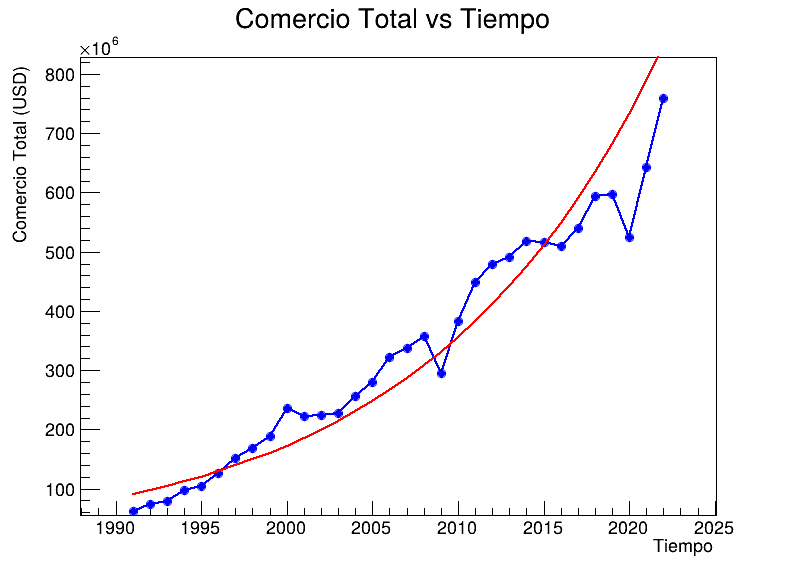

In [100]:
# Convertimos a arrays de numpy
x_root = np.array(años, dtype='double')
y_root = np.array(Comercio['Comercio Total'], dtype='double')
y_root2 = np.array(DComercio['MEX_USA'], dtype='double')
y_pred = np.array(X['$X_{t}$'], dtype='double')
y_err = np.array(DComercio['Abs_Diferencia'], dtype='double')  # barras de error

if ROOT.gROOT.FindObject("c"):
    ROOT.gROOT.FindObject("c").Close()

# Creamos los gráficos
graph = ROOT.TGraphErrors(len(x_root), x_root, y_root,
                          np.zeros(len(x_root)), y_err)
graph2 = ROOT.TGraphErrors(len(x_root), x_root, y_root2)
graphRegresion = ROOT.TGraph(len(x_root), x_root, y_pred)

# Estilo para datos
graph.SetTitle("Comercio Total vs Tiempo;Tiempo;Comercio Total (USD)")
graph.SetMarkerStyle(20)
graph.SetMarkerColor(ROOT.kBlue)
graph.SetLineColor(ROOT.kBlue)
graph.SetLineWidth(2)

# Estilo graph2
#graph2.SetTitle("Comercio Total vs Tiempo;Tiempo;Comercio Total (USD)")
graph2.SetMarkerStyle(20)
graph2.SetMarkerColor(ROOT.kGreen)
graph2.SetLineColor(ROOT.kGreen)
graph2.SetLineWidth(2)
# Estilo para regresión
graphRegresion.SetMarkerStyle(20)
graphRegresion.SetMarkerColor(ROOT.kRed)
graphRegresion.SetLineColor(ROOT.kRed)
graphRegresion.SetLineWidth(2)
# Creamos el canvas
c = ROOT.TCanvas("c", "Comercio Total", 800, 600)
# Dibuja con errores
graph.Draw("APL")            # A=axes, P=puntos, L=Linea (con errores)
graph2.Draw("PL SAME")
graphRegresion.Draw("L SAME")
# Leyenda
legend = ROOT.TLegend(0.15, 0.75, 0.45, 0.88)
legend.AddEntry(graph, "USA_MEX", "lep")
legend.AddEntry(graph2, "MEX_USA", "lep")
legend.AddEntry(graphRegresion, "Regresion", "l")
legend.Draw()
# Dibuja todo
c.Draw()

### Casos
---
Utilizamos los códigos anteriores para reproducir la gráfica anterior para los siguientes casos:

1. Reporter='CHN' y partner='USA' y reporter='USA' con partner='CHN'.
2. Reporter='CHN' y partner='MEX' y reporter='MEX' con partner='CHN'.
3. Reporter='CHN' y partner='CAN' y reporter='CAN' con partner='CHN'.


In [1]:
def convert_awkward_to_str(df):
    """Convierte columnas de tipo 'awkward' a 'string'."""
    awk_cols = df.select_dtypes(include='awkward').columns
    df[awk_cols] = df[awk_cols].apply(lambda col: col.astype(str))
    return df
def obtener_comercio_total(reporter, partner, ruta_base="/home/shared/odin/"):
    """
    Carga los archivos ROOT de exportación e importación para un par
    y devuelve una Serie de Pandas con el Comercio Total por año.
    """
    file_exp_path = f"{ruta_base}{reporter}_{partner}_EXPORT.root"
    file_imp_path = f"{ruta_base}{reporter}_{partner}_IMPORT.root"
    try:
        tabla_exp_file = uproot.open(file_exp_path)
        tabla_exp = tabla_exp_file['FilteredTree'].arrays(library="pd")
        tabla_exp = convert_awkward_to_str(tabla_exp)
        tabla_imp_file = uproot.open(file_imp_path)
        tabla_imp = tabla_imp_file['FilteredTree'].arrays(library="pd")
        tabla_imp = convert_awkward_to_str(tabla_imp)
        
    except Exception as e:
        print(f"Error cargando archivos para {reporter}_{partner}: {e}")
        print(f"Asegúrate que los archivos .root filtrados existan en {ruta_base}")
        return None

    exportacion = tabla_exp.groupby('EndYear')['TradeValue'].sum()
    importacion = tabla_imp.groupby('EndYear')['TradeValue'].sum()
    comercio = pd.DataFrame({'Importación Total': importacion, 'Exportación Total': exportacion})
    comercio = comercio.fillna(0) # Rellenar años faltantes si uno tiene datos y el otro no
    comercio['Comercio Total'] = comercio['Importación Total'] + comercio['Exportación Total']

    return comercio['Comercio Total']

def analizar_y_graficar_pares(rep1, part1, rep2, part2):
    """
    Realiza el análisis completo: carga datos de ambos reportantes,
    calcula la discrepancia, ejecuta la regresión y grafica con ROOT.
    """

    comercio_1 = obtener_comercio_total(rep1, part1) 
    comercio_2 = obtener_comercio_total(rep2, part2) 
    
    if comercio_1 is None or comercio_2 is None:
        print("No se pudieron cargar los datos. Abortando análisis.")
        return
    dcomercio = pd.DataFrame({
        f"{rep1}_{part1}": comercio_1,
        f"{rep2}_{part2}": comercio_2
    })
    dcomercio = dcomercio.fillna(0) # Rellenar años donde un país no reportó
    dcomercio['Diferencia'] = dcomercio[f"{rep1}_{part1}"] - dcomercio[f"{rep2}_{part2}"]
    dcomercio['Abs_Diferencia'] = dcomercio['Diferencia'].abs()
    comercio_reg = comercio_1[comercio_1 > 0].copy() 
    if comercio_reg.empty:
        print(f"No hay datos de comercio positivo para {rep1}_{part1} para la regresión.")
        return
    años = comercio_reg.index.to_frame()
    t = (años - años.min()).EndYear.to_frame() # Variable 't' (tiempo)  :D
    LnX = np.log(comercio_reg).to_frame()     # Variable 'ln(X_t)'
    modelo = LinearRegression()
    modelo.fit(t, LnX)
    # r. regresion
    beta_1 = modelo.intercept_[0]
    beta_2 = modelo.coef_[0,0]
    r = np.exp(beta_2) - 1
    print(f"--- Resultados de Regresión para {rep1}_{part1} ---")
    print(f"  Beta 1 (ln(X_0)): {beta_1:.4f}")
    print(f"  Beta 2 (Tasa de crecimiento continuo): {beta_2:.4f}")
    print(f"  Tasa de Crecimiento Anual (r): {r*100:.2f}%")
    t_full = (dcomercio.index - dcomercio.index.min()).to_frame(index=False)
    X_pred = np.exp(modelo.predict(t_full))
    x_root = np.array(dcomercio.index, dtype='double')
    y_root_1 = np.array(dcomercio[f"{rep1}_{part1}"], dtype='double')
    y_root_2 = np.array(dcomercio[f"{rep2}_{part2}"], dtype='double')
    y_pred = np.array(X_pred, dtype='double')
    y_err = np.array(dcomercio['Abs_Diferencia'], dtype='double')
    canvas_name = f"c_{rep1}_{part1}"
    if ROOT.gROOT.FindObject(canvas_name):
        ROOT.gROOT.FindObject(canvas_name).Close()   
    c = ROOT.TCanvas(canvas_name, f"Comercio {rep1}-{part1} vs {rep2}-{part2}", 800, 600)
    #graph part
    graph = ROOT.TGraphErrors(len(x_root), x_root, y_root_1, np.zeros(len(x_root)), y_err)
    graph.SetTitle(f"Comercio Total ({rep1} vs {rep2});Tiempo;Comercio Total (USD)")
    graph.SetMarkerStyle(20)
    graph.SetMarkerColor(ROOT.kBlue)
    graph.SetLineColor(ROOT.kBlue)
    graph.SetLineWidth(2)
    graph2 = ROOT.TGraphErrors(len(x_root), x_root, y_root_2) 
    graph2.SetMarkerStyle(20)
    graph2.SetMarkerColor(ROOT.kGreen)
    graph2.SetLineColor(ROOT.kGreen)
    graph2.SetLineWidth(2)
    graphRegresion = ROOT.TGraph(len(x_root), x_root, y_pred)
    graphRegresion.SetLineColor(ROOT.kRed)
    graphRegresion.SetLineWidth(2)
    graph.Draw("APL")
    graph2.Draw("PL SAME")
    graphRegresion.Draw("L SAME")
    legend = ROOT.TLegend(0.15, 0.75, 0.45, 0.88)
    legend.AddEntry(graph, f"{rep1} reporta {part1}", "lep")
    legend.AddEntry(graph2, f"{rep2} reporta {part2}", "lep")
    legend.AddEntry(graphRegresion, f"Regresión {rep1}_{part1}", "l")
    legend.Draw()
    c.Draw()
    return c, graph, graph2, graphRegresion, legend

In [ ]:
# Reporter='CHN' y partner='USA' y reporter='USA' con partner='CHN'
analizar_y_graficar_pares(rep1="CHN", part1="USA", rep2="USA", part2="CHN")


In [ ]:
# Reporter='CHN' y partner='MEX' y reporter='MEX' con partner='CHN'
analizar_y_graficar_pares(rep1="CHN", part1="MEX", rep2="MEX", part2="CHN")

In [ ]:
# Reporter='CHN' y partner='CAN' y reporter='CAN' con partner='CHN'
analizar_y_graficar_pares(rep1="CHN", part1="CAN", rep2="CAN", part2="CHN")